
### <img src="ANZ-brand.svg.png" width = "200" height = "20" align="left"> <br><br>


## **PREDICTIVE ANALYTIC REPORT**

This analysis is designed to predict customer salary correlation with certain custom attributes and then create models for predicting future salary trends


<hr style="border:1px solid gray">

### Import Required Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get Data For Analysis

In [38]:
data = "ANZ_synthesised_transaction_dataset.xlsx"
customer_data = pd.read_excel(data)

In [4]:
customer_data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
customer_data.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


### Checking Details of data

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [8]:
customer_data.shape

(12043, 23)

In [10]:
customer_data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


### Getting the Data Cleaned

In [14]:
customer_data.isnull()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
12039,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
12040,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
12041,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
customer_data['balance'].isnull().value_counts()

False    12043
Name: balance, dtype: int64

In [21]:
customer_data['age'].isnull().value_counts()

False    12043
Name: age, dtype: int64

In [25]:
#Checking for outliers
customer_data['age'].describe()

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

<AxesSubplot:>

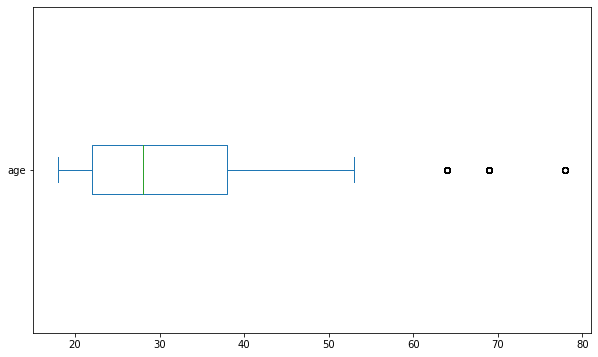

In [27]:
#Checking for outliers
customer_data['age'].plot(kind='box', vert=False, figsize = (10, 6))

In [22]:
customer_data['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [24]:
customer_data['amount'].isnull().value_counts()

False    12043
Name: amount, dtype: int64

In [37]:
#Checking for outliers
customer_data['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

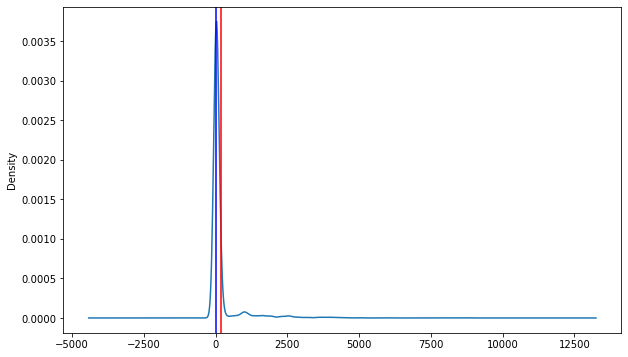

In [35]:
dx = customer_data['amount'].plot(kind='density', figsize = (10,6))
dx.axvline(customer_data['amount'].mean(), color="red")
dx.axvline(customer_data['amount'].median(), color='blue')

In [39]:
customer_data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

<AxesSubplot:ylabel='txn_description'>

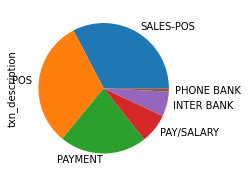

In [44]:
customer_data['txn_description'].value_counts().plot(kind="pie", figsize =(4,3))

In [41]:
customer_data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

<AxesSubplot:ylabel='status'>

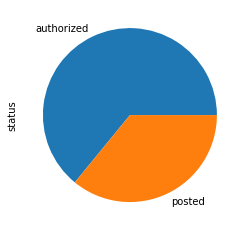

In [43]:
customer_data['status'].value_counts().plot(kind="pie", figsize=(4,4))

In [39]:
customer_data['salary'] = customer_data['amount'] + customer_data['balance']
customer_data['salary'].head()

0      51.64
1      35.39
2      12.13
3    2158.12
4      21.20
Name: salary, dtype: float64

<AxesSubplot:>

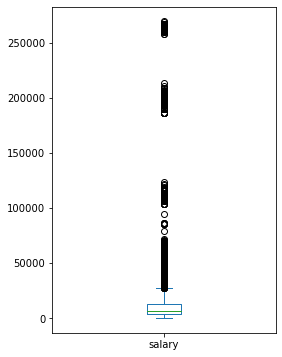

In [46]:
customer_data['salary'].plot(kind="box", figsize=(4,6))

## Finding Relationships and Correlations

In [51]:
corr = customer_data.corr()
corr

,card_present_flag,merchant_code,balance,age,amount,salary
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074,0.005912
merchant_code,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178,0.999824
age,-0.008405,NaN,0.199329,1.000000,0.029980,0.199636
amount,-0.002074,NaN,0.059178,0.029980,1.000000,0.077888
salary,0.005912,NaN,0.999824,0.199636,0.077888,1.000000


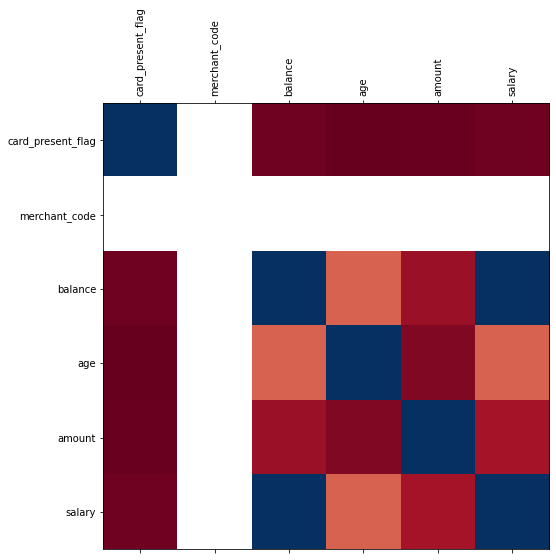

In [53]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

### It is clear that Merchant code has no impact on the data <br>
If we decide to drop it the new correlation will look like this

In [57]:
corr = customer_data.drop(['merchant_code'], axis = 1).corr()
corr

,card_present_flag,balance,age,amount,salary
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,0.005912
balance,0.005925,1.000000,0.199329,0.059178,0.999824
age,-0.008405,0.199329,1.000000,0.029980,0.199636
amount,-0.002074,0.059178,0.029980,1.000000,0.077888
salary,0.005912,0.999824,0.199636,0.077888,1.000000


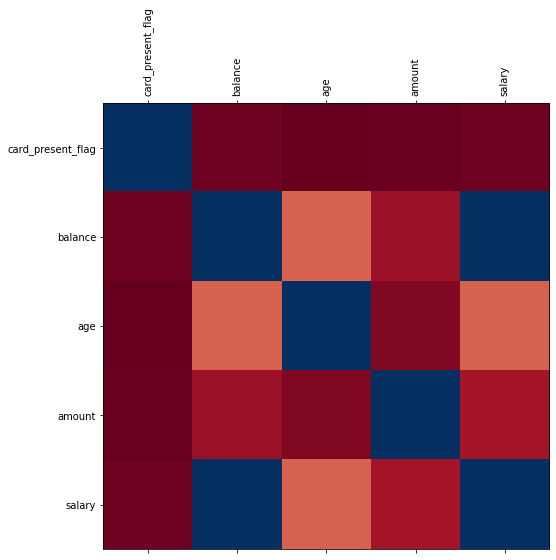

In [58]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='age', ylabel='salary'>

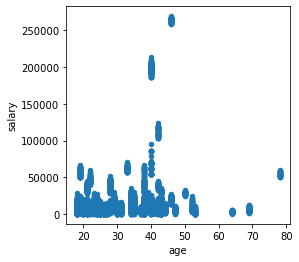

In [67]:
customer_data.plot(kind='scatter', x= 'age', y='salary', figsize=(4,4))

### Creating a regression model

<AxesSubplot:xlabel='age', ylabel='salary'>

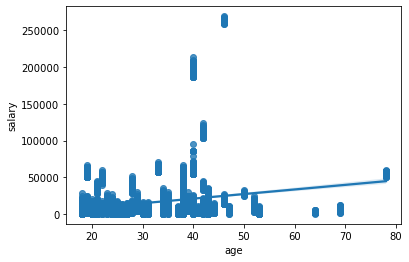

In [8]:
#simple linear regression
sns.regplot(x='age', y='salary', data=customer_data)

<AxesSubplot:xlabel='amount', ylabel='salary'>

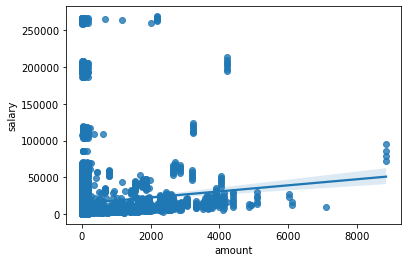

In [12]:
#Relationship between the amount a customer is willing to spend and his salary
sns.regplot(x='amount', y='salary', data=customer_data)

In [60]:
#predicting the salary model based on amount spent, age, and account balance
reqdata = customer_data[['balance','age','amount','salary']]
reqdata.head()


,balance,age,amount,salary
0,35.39,26,16.25,51.64
1,21.20,26,14.19,35.39
2,5.71,38,6.42,12.13
3,2117.22,40,40.90,2158.12
4,17.95,26,3.25,21.20


<AxesSubplot:>

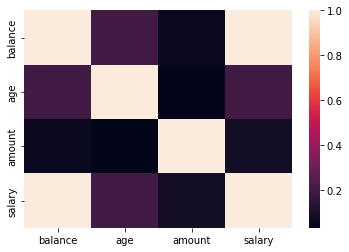

In [61]:
#correlation matrix for the new data
sns.heatmap(reqdata.corr())

In [62]:

x = reqdata.iloc[:, :-1].values
y = reqdata.iloc[:, 3].values


In [63]:
#spliting dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [64]:
#fitting mutiple linear regression to the training set
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(x_train, y_train)

LinearRegression()

In [65]:
y_predict = model_fit.predict(x_test)
y_predict

array([2176.02, 7920.17, 6370.68, ...,  183.91,  360.95,  492.41])

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


1.0

### Perfect Model 
The Age, Account balance and amount spent can be used to predict the salary of a customer